# Introduction au language R et aux librairies pour la géomatique
***
### Antananarivo - Madagascar - Octobre 2023
#### Florent VEILLON (florent.veillon@ird.fr)


## Quelques mots sur R
***
* **R** est un logiciel libre et gratuit.
* Les utilisateurs **peuvent contribuer** en créant des fonctions et en les distribuant à la communauté (**packages**).
* Très forte communauté donc mise à jour et maintenance en continue (=> beaucoup de documentations).
* **R** et Python font partie des outils les plus utilisés en sciences des données. 
* Au départ R est un language  orienté vers le traitement de données et l'analyse statistique.
### Installation

Pour pouvoir commencer à coder, il est nécessaire d'installer deux outils indispensables :
* le logiciel *R*.
* un environnement de développement (IDE) nécessaire à l'écriture du code et à son exécution.
#### Installer R

Se rendre sur le [site officiel de R](https://cran.r-project.org/) puis 
- (i) choisir la version de R (de base) qui correspond à votre système d’exploitation (Linux, macOS, ou Windows), 
- (ii) la télécharger, 
- (iii) l’installer sur votre machine.
#### Installation d'un IDE

L'IDE le plus utilisé pour la mobilisation du language R est [RStudio](https://posit.co/download/rstudio-desktop/), mais d'autres IDE peuvent fonctionner comme par exemple [Pycharm](https://www.jetbrains.com/fr-fr/pycharm/) (utilisé pour Python notamment). Ce dernier fonctionne avec l'installation du Plugins *R Language for IntelliJ*.


## Le spatial dans R
***
### Historique et évolutions
Historiquement, 4 packages permettent d’importer, de manipuler et de transformer les données spatiales :
- Le package ```rgdal``` , qui est une interface entre R et les librairies GDAL et PROJ. Il permet entre autres d'importer et d'exporter les données spatiales (ex : .shp) mais aussi de gérer les projections.
- Le package ```sp```, qui fournit des classes et méthodes pour les données spatiales vectorielles dans R. Il permet aussi d'afficher des fonds de cartes, d'inspecter une table attributaire etc.
- Le package ```rgeos``` donne accès à la librairie d'opérations spatiales GEOS et rend donc disponible les opérations SIG classiques : calcul de surfaces, intersections etc.
- Le package ```raster``` est dedié à l'import, la manipulation et la modélisation des données raster.

Aujourd'hui les principaux développements concernant les données vectorielles se sont détachés des 3 anciens packages (```rgdal```,```sp```,```rgeos```) pour se reposer sur le package ```sf```. 

Pour le traitement des données raster, le package ```raster``` est remplacé par le package ```terra``` (le package ```stars``` peut aussi être utilisé).

> Pour information, les packages ```rgdal```,```rgeos``` et ```raster``` sont devenus obsolètes courant 2023. Une multitude de packages possèdent des dépendances vis à vis de ces 3 packages (nottamment sf). Une opération visant à pointer les packages ```sf``` et ```terra``` pour l'utilisation de ```sf``` est donc nécessaire.
La méthode à suivre est expliquée sur la [page](https://r-spatial.org/r/2022/04/12/evolution.html).

> **Dans ce document, nous nous appuierons sur le package ```sf``` pour manipuler les données vectorielles et sur le package ```terra``` pour le traitement des données raster.**


## Données utilisées
***
Différents types de données seront utilisés dans ce document. Ces données sont récupérables dans le fichier ```/data/```.

Type de donnée | Donnée        | Nom du fichier
---------------|---------------|---------------
Vecteur (Polygons) | Limites adiministratives (District)|  mdg_admbnda_adm2_BNGRC_OCHA_20181031.shp
Vecteur (Lignes)| Réseau routier (région d'Antananarivo)  | osm_road_Tana_wgs84.shp
Vecteur (Points) | Points d'interêt (région d'Antananarivo) | osm_point_of_interest_Tana_wgs84.shp
Raster         | Modèle Numérique de Terrain | DEM_Madagascar_WGS84.tif
Raster | Images Sentinel-2 | RGB : s2_image_L2A_60m_TCI_.tif IR : T38KLV_20230312T072209_B8A_60m.jp2

## Les données vectorielles
***
### Import et format des objets spatiaux ```sf```
Les objects ```sf``` sont des ```data.frame``` dont l'une des colonnes contient les géométries. Les autres colonnes correspondent aux champs attributaires de la données.
> Lors de l'import d'une couche vectorielle via la fonction ```st_read()``` , différentes informations sur cette dernière sont affichées (nombre d'entité, nombre de champ attributaire, type de géométrie, système de coordonnées...).

In [2]:
# Utile ici pour ne pas afficher les warnings (uniquement pour document)
options(warn=-1)
Sys.setenv("_SP_EVOLUTION_STATUS_"=2)
# Chargement de la librairie sf
library(sf)
# Import de la couche vectorielle des limites administratives
lim_admin <- st_read("./data/mdg_admbnda_adm2_BNGRC_OCHA_20181031.shp")

Reading layer `mdg_admbnda_adm2_BNGRC_OCHA_20181031' from data source 
  `C:\Users\florent\Desktop\Atelier_Mada\R\GeomatiqueR\data\mdg_admbnda_adm2_BNGRC_OCHA_20181031.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 119 features and 11 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 43.17692 ymin: -25.60575 xmax: 50.48485 ymax: -11.95139
Geodetic CRS:  WGS 84


### Affichage
**Aperçu** des variables via les fonctions ```head()``` et ```plot()``` :

In [4]:
options(warn=-1)
#Ici seulement les 6 premières entités sont montrées
head(lim_admin)

ADM0_PCODE ADM0_EN    ADM1_PCODE ADM1_EN    ADM1_TYPE ADM2_PCODE 
1 MG         Madagascar MG11       Analamanga Region    MG11101001A
2 MG         Madagascar MG11       Analamanga Region    MG11101002A
3 MG         Madagascar MG11       Analamanga Region    MG11101003A
4 MG         Madagascar MG11       Analamanga Region    MG11101004A
5 MG         Madagascar MG11       Analamanga Region    MG11101005A
6 MG         Madagascar MG11       Analamanga Region    MG11101006A
  ADM2_EN            ADM2_TYPE PROV_CODE OLD_PROVIN  
1 1er Arrondissement District  1         Antananarivo
2 2e Arrondissement  District  1         Antananarivo
3 3e Arrondissement  District  1         Antananarivo
4 4e Arrondissement  District  1         Antananarivo
5 5e Arrondissement  District  1         Antananarivo
6 6e Arrondissement  District  1         Antananarivo
  PROV_TYPE                                geometry                      
1 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.50556 -1...
2 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.55842 -1...
3 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.51365 -1...
4 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.50262 -1...
5 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.535 -18....
6 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.48436 -1...

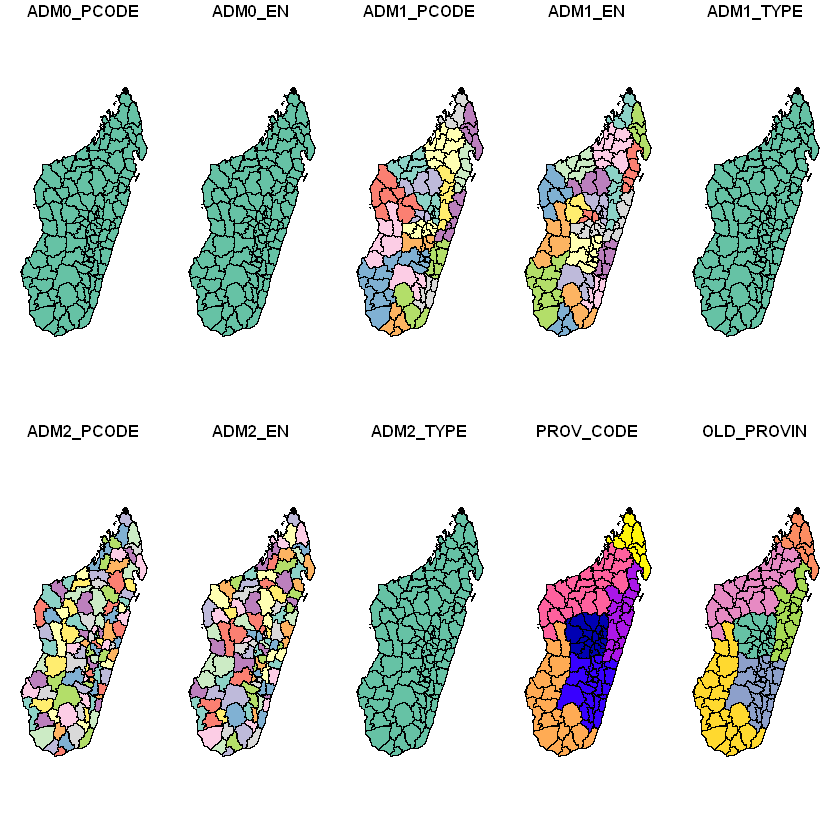

In [5]:
plot(lim_admin)

**Affichage de la géométrie** uniquement :

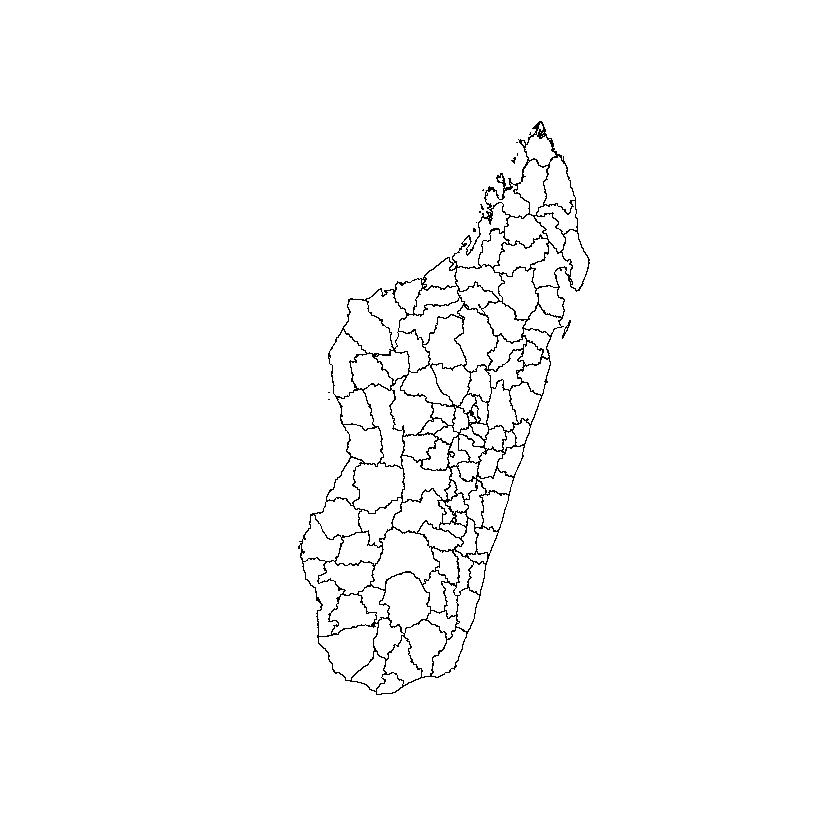

In [6]:
plot(st_geometry(lim_admin))

> Pour ajouter plusieurs couches à notre carte, il suffit d'utiliser l'argument ```add = TRUE``` dans la fonction ```plot()``` de la couche que l'on souhaite ajouter.

In [7]:
# Import de la couche vectorielle des points d'interêt
poi_osm <- st_read("./data/osm_point_of_interest_Tana_wgs84.shp")

Reading layer `osm_point_of_interest_Tana_wgs84' from data source 
  `C:\Users\florent\Desktop\Atelier_Mada\R\GeomatiqueR\data\osm_point_of_interest_Tana_wgs84.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 3830 features and 4 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 47.22835 ymin: -19.14354 xmax: 47.91435 ymax: -18.64022
Geodetic CRS:  WGS 84


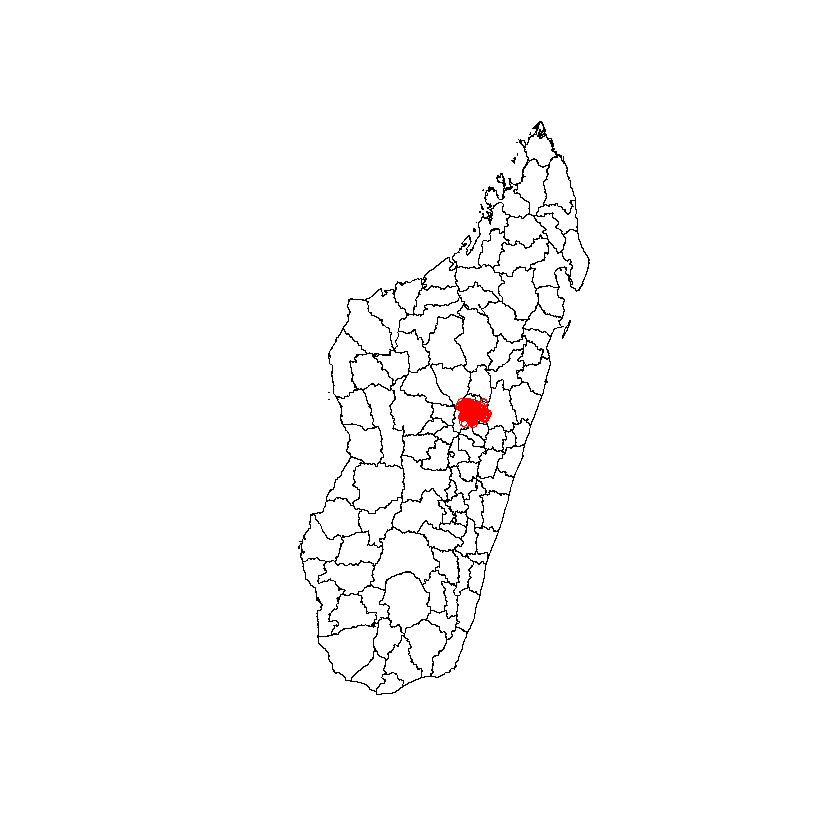

In [8]:
plot(st_geometry(lim_admin))
plot(st_geometry(poi_osm), add = TRUE, col = "red")

### Les systèmes de coordonnées
#### Consulter le système de coordonnées d'un objet
La fonction ```st_crs()``` permet de consulter le système de coordonnées utilisé par un objet ```sf``` :

In [9]:
st_crs(lim_admin)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

#### Modifier le système de coordonnées d'un objet 
La fonction ```st_transform()``` permet de changer le système de coordonnées d'un objet ```sf``` et le reprojeter :

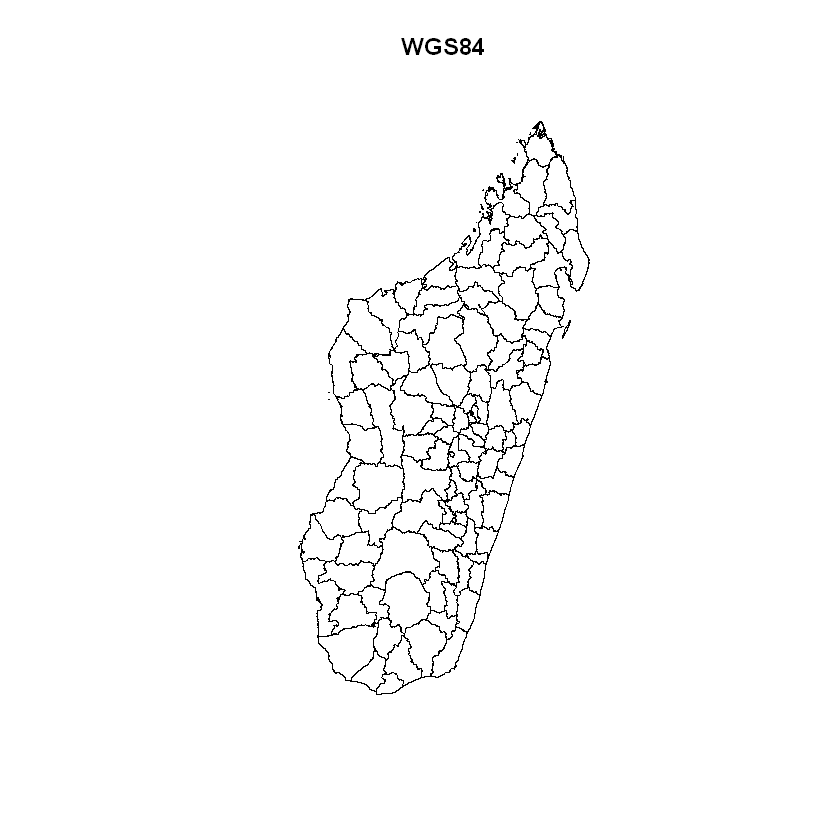

In [10]:
plot(st_geometry(lim_admin))
title("WGS84")

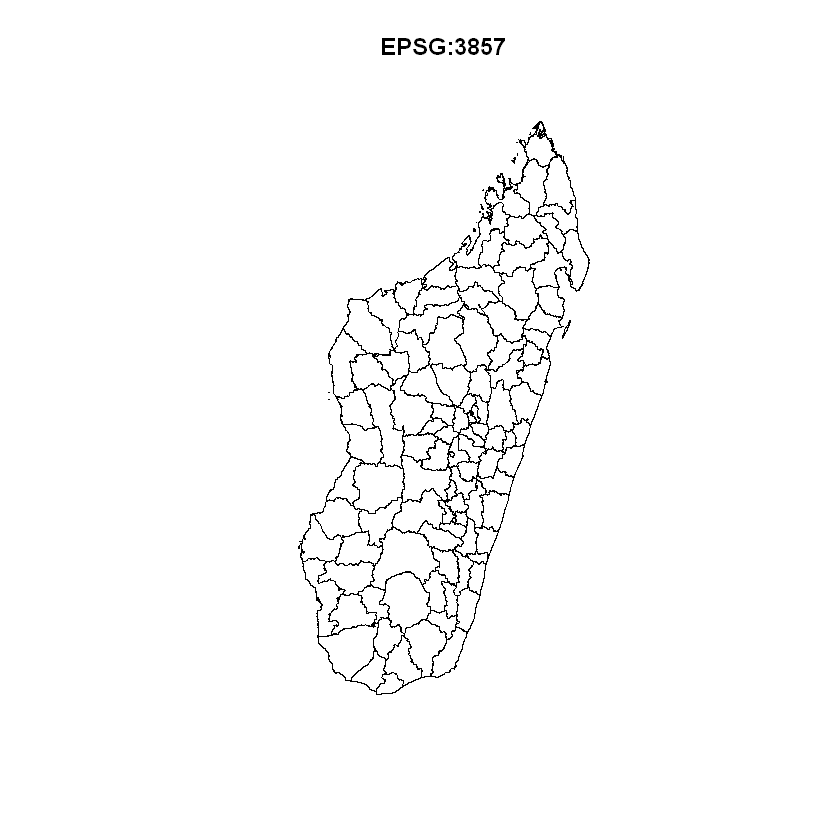

In [11]:
lim_admin_reproj <- st_transform(lim_admin, "+init=epsg:3857")
plot(st_geometry(lim_admin))
title("EPSG:3857")

Le site [Spatial Reference](https://spatialreference.org/) met à disposition les références de très nombreux systèmes de coordonnées.

### Séléction par attributs
#### Séléction par index
Les objets ```sf``` sont des ```data.frame```, on peut donc sélectionner leurs lignes et leur colonnes de la même manière que les ```data.frame```. 

In [31]:
#Séléction des lignes 1 jusqu'à 2 et de la totalité des colonnes
lim_admin[1:2, ]

ADM0_PCODE ADM0_EN    ADM1_PCODE ADM1_EN    ADM1_TYPE ADM2_PCODE 
1 MG         Madagascar MG11       Analamanga Region    MG11101001A
2 MG         Madagascar MG11       Analamanga Region    MG11101002A
  ADM2_EN            ADM2_TYPE PROV_CODE OLD_PROVIN  
1 1er Arrondissement District  1         Antananarivo
2 2e Arrondissement  District  1         Antananarivo
  PROV_TYPE                                geometry                      
1 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.50556 -1...
2 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.55842 -1...

In [13]:
#Séléction des lignes 1 jusqu'à 2 et des colonnes 1 à 3 
lim_admin[1:2, 1:3]

ADM0_PCODE ADM0_EN    ADM1_PCODE geometry                      
1 MG         Madagascar MG11       MULTIPOLYGON (((47.50556 -1...
2 MG         Madagascar MG11       MULTIPOLYGON (((47.55842 -1...

> Lors de la séléction d'entités d'une couche, le champs contenant la géometrie est toujours conservé.

#### Séléction par valeur d'attribut
Il est aussi possible de séléctionner une ligne/colonne par rapport à la valeur de cette dernière :

In [14]:
# Séléction des district de la région de Analamanga et de la colonne contenant le nom de la région et des districts
lim_admin[lim_admin$ADM1_EN == "Analamanga", c("ADM1_EN","ADM2_EN")]

ADM1_EN    ADM2_EN                   geometry                      
1  Analamanga 1er Arrondissement        MULTIPOLYGON (((47.50556 -1...
2  Analamanga 2e Arrondissement         MULTIPOLYGON (((47.55842 -1...
3  Analamanga 3e Arrondissement         MULTIPOLYGON (((47.51365 -1...
4  Analamanga 4e Arrondissement         MULTIPOLYGON (((47.50262 -1...
5  Analamanga 5e Arrondissement         MULTIPOLYGON (((47.535 -18....
6  Analamanga 6e Arrondissement         MULTIPOLYGON (((47.48436 -1...
7  Analamanga Antananarivo Avaradrano   MULTIPOLYGON (((47.61521 -1...
8  Analamanga Ambohidratrimo            MULTIPOLYGON (((47.49982 -1...
9  Analamanga Ankazobe                  MULTIPOLYGON (((46.74249 -1...
10 Analamanga Manjakandriana            MULTIPOLYGON (((47.72437 -1...
11 Analamanga Anjozorobe                MULTIPOLYGON (((47.84665 -1...
12 Analamanga Andramasina               MULTIPOLYGON (((47.72871 -1...
13 Analamanga Antananarivo Atsimondrano MULTIPOLYGON (((47.47574 -1...

### Séléction spatiale
#### Intersection

Reading layer `osm_road_Tana_wgs84' from data source 
  `C:\Users\florent\Desktop\Atelier_Mada\R\GeomatiqueR\data\osm_road_Tana_wgs84.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 81629 features and 10 fields
Geometry type: LINESTRING
Dimension:     XY
Bounding box:  xmin: 47.18974 ymin: -19.17844 xmax: 48.01925 ymax: -18.57846
Geodetic CRS:  WGS 84


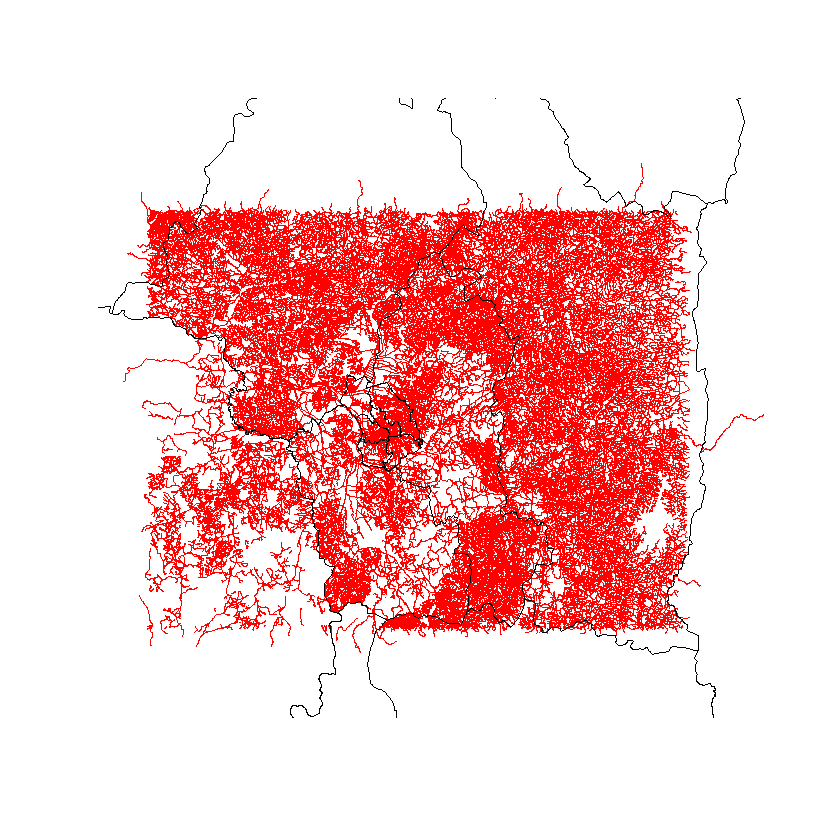

In [15]:
# Import de la couche des routes sur la zone élargie d'Antananarivo
route <- st_read("./data/osm_road_Tana_wgs84.shp")
plot(st_geometry(route), col = "red")
plot(st_geometry(lim_admin), add = TRUE)

Sélection des routes **intersectant** la commune du 1er arrondissement d'Antananarivo :

In [16]:
# Séléction des limites administratives du 1er arrondissement d'Antananarivo
tana_1erArron <-  lim_admin[(lim_admin$ADM1_EN == "Analamanga") &(lim_admin$ADM2_EN == "1er Arrondissement"), ]
head(tana_1erArron)

ADM0_PCODE ADM0_EN    ADM1_PCODE ADM1_EN    ADM1_TYPE ADM2_PCODE 
1 MG         Madagascar MG11       Analamanga Region    MG11101001A
  ADM2_EN            ADM2_TYPE PROV_CODE OLD_PROVIN  
1 1er Arrondissement District  1         Antananarivo
  PROV_TYPE                                geometry                      
1 Old Provinces/Faritany dissolved in 2007 MULTIPOLYGON (((47.50556 -1...

In [19]:
#Intersection avec la couche du réseau routier
inter <- st_intersects(x = route, y = tana_1erArron, sparse = FALSE)
print(head(inter))

      [,1]
[1,] FALSE
[2,] FALSE
[3,] FALSE
[4,] FALSE
[5,] FALSE
[6,] FALSE


> L’objet ```inter``` est une matrice qui indique pour chacun des éléments de l’objet ```route``` si il
intersecte chacun des élément de l’objet ```tana_1erArron```.

Il est ensuite possible de créer une colonne à partir de cet objet.

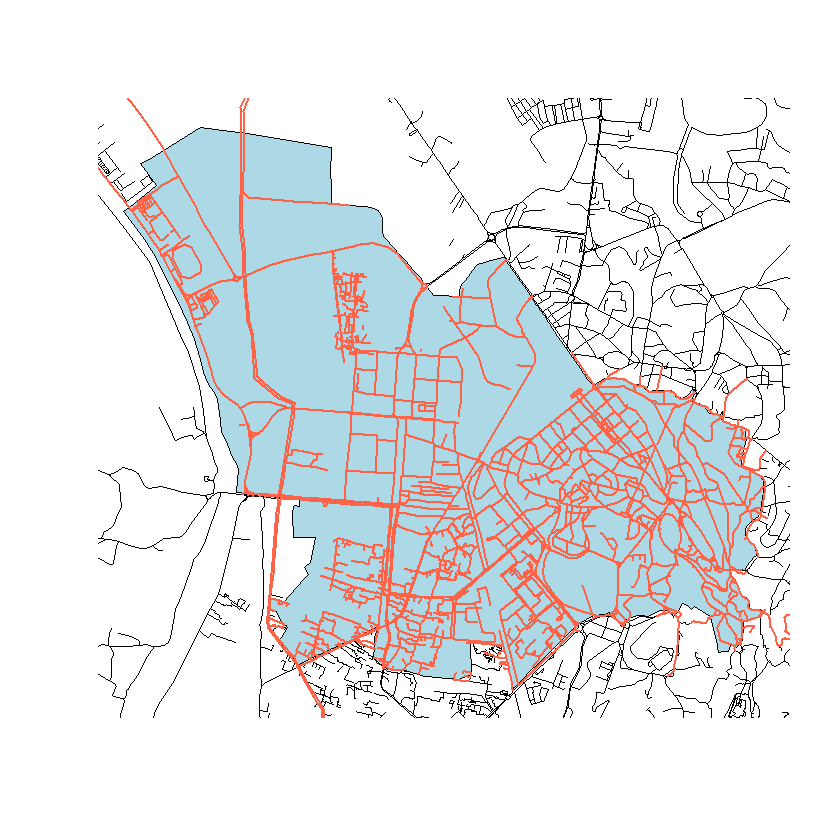

In [20]:
route$intersect_1erArron <- inter
# Ici on montre les routes intersectées par le district selectionné 
plot(st_geometry(tana_1erArron), col = "lightblue")
plot(st_geometry(route), add = TRUE)
plot(st_geometry(route[route$intersect_1erArron, ]), col = "tomato", lwd = 2, add = TRUE)

#### Countains/Within
Sélection des routes **contenues** dans le 1er arrondissement d'Antananarivo. Pour cela, le fonction ```st_within()``` est utilisée et fonctionne de la même manière que ```st_intersects()```:

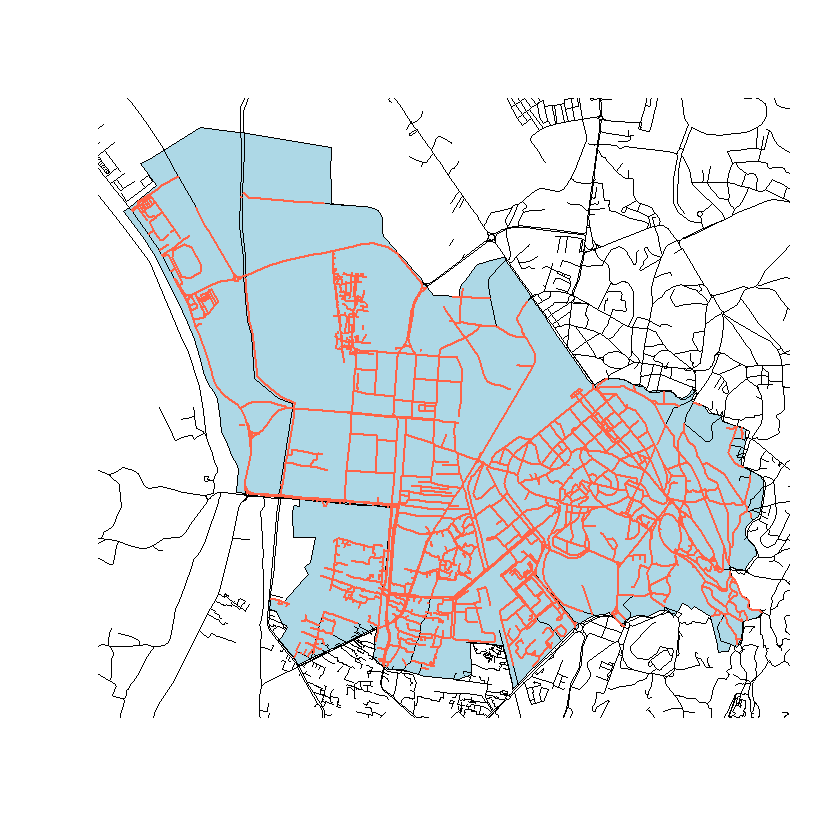

In [21]:
route$within_1erArron <- st_within(route, tana_1erArron, sparse = FALSE)

plot(st_geometry(tana_1erArron), col = "lightblue")
plot(st_geometry(route), add = TRUE)
plot(st_geometry(route[route$within_1erArron, ]), col = "tomato",  lwd = 2, add = TRUE)

### Opérations sur les géométries
#### Extraire des centroïdes
Ici, nous voulons extraire les centroïdes de chaque district. Cela est rendu possible par la fonction ```st_centroid()```

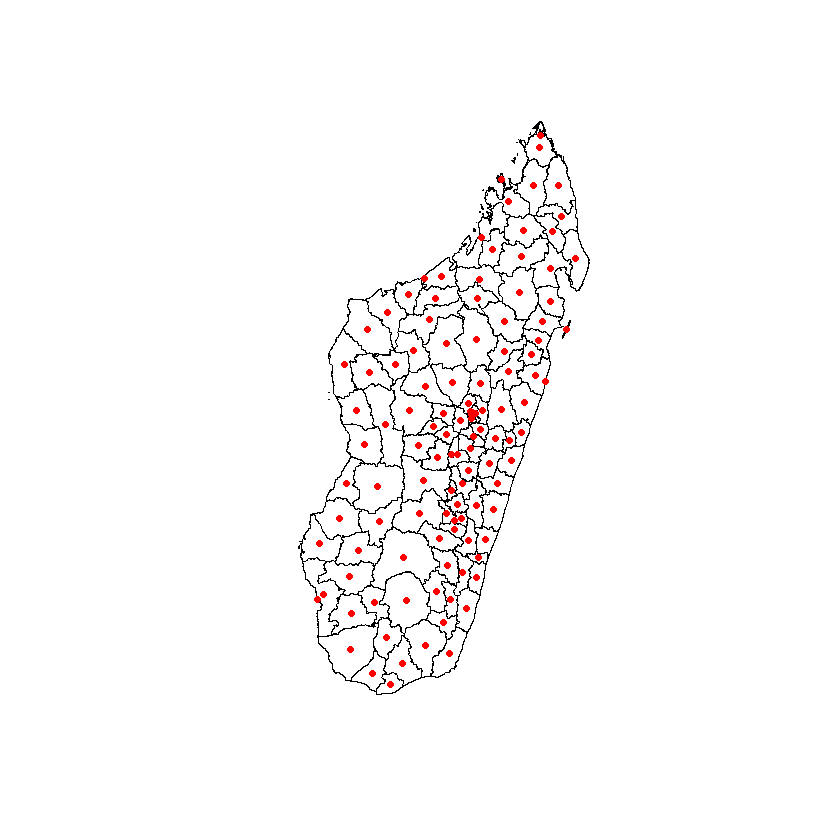

In [22]:
lim_admin_c <- st_centroid(lim_admin)

plot(st_geometry(lim_admin))
plot(st_geometry(lim_admin_c), add = TRUE, cex = 1.2, col = "red", pch = 20)

#### Agréger des polygones
Il est aussi possible de fusionner l'ensemble des entités d'une couche en une seule et même entité via la fonction ```st_union()``` :

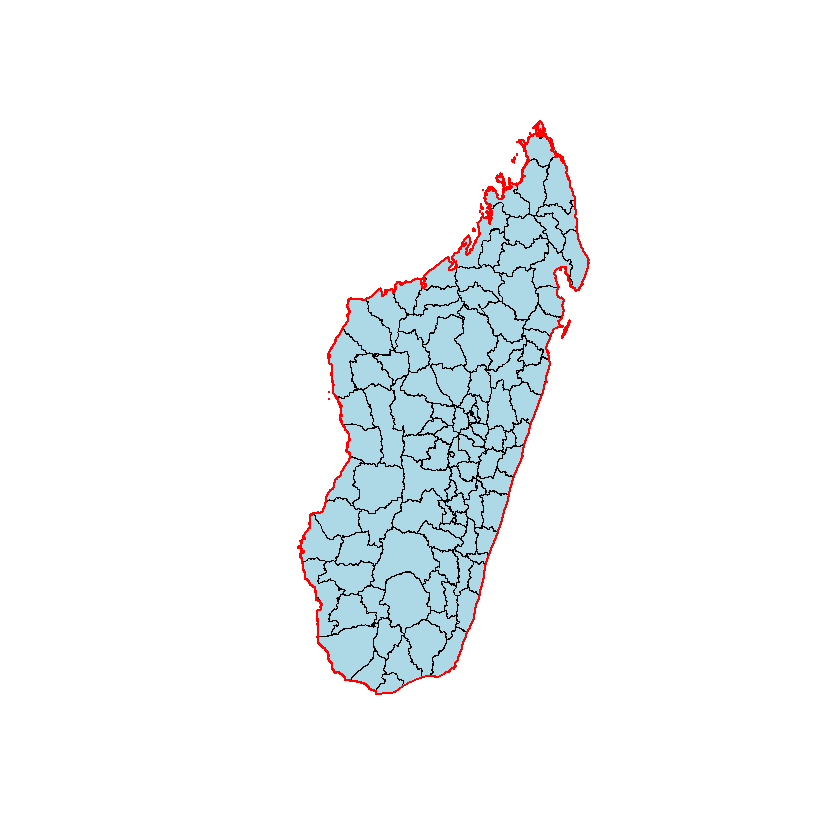

In [23]:
lim_admin_mada <- st_union(lim_admin)

plot(st_geometry(lim_admin), col = "lightblue")
plot(st_geometry(lim_admin_mada), add = TRUE, lwd = 2, border = "red")

#### Construire une zone tampon
Pour construire une zone tampon autour d'une entité, il est nécessaire d'utiliser la fonction ```st_buffer``` :

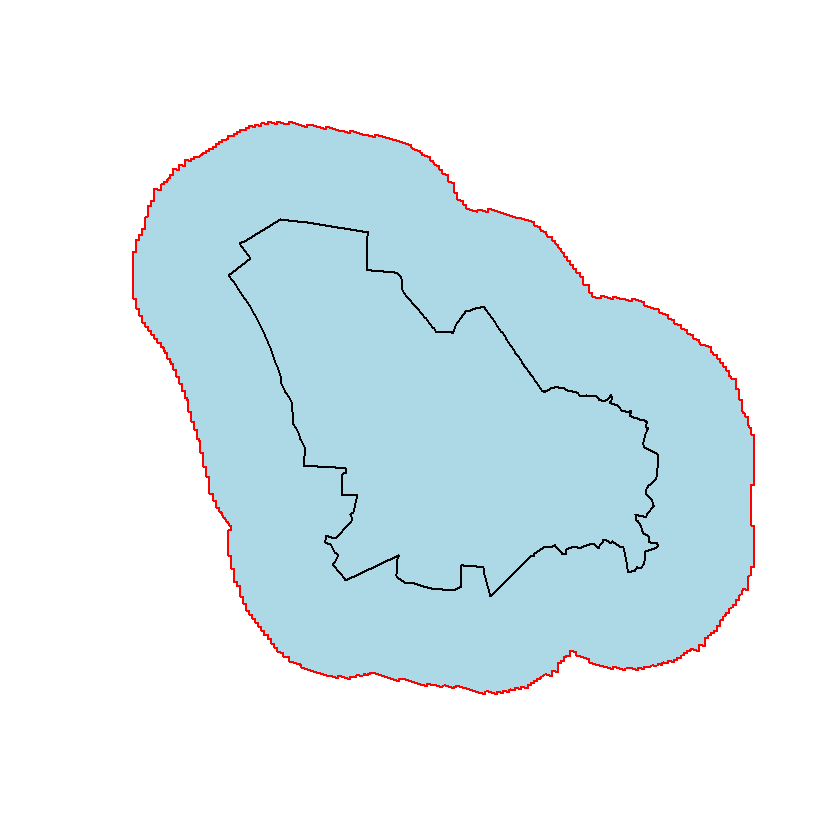

In [24]:
# Création d'une zone tampon d'1km autour du 1er arrondissement d'Antananarivo
tana_1erArron_b <- st_buffer(x = tana_1erArron, dist = 1000)

plot(st_geometry(tana_1erArron_b), col = "lightblue", lwd=2, border = "red")
plot(st_geometry(tana_1erArron), add = TRUE, lwd = 2)

#### Réaliser une intersection
En utilisant la fonction ```st_intersection()``` on va découper une couche par une autre.
> Ici, on souhaite découper les routes et les districts par le buffer du 1er arrondissement d'Antananarivo calculé précédemment :

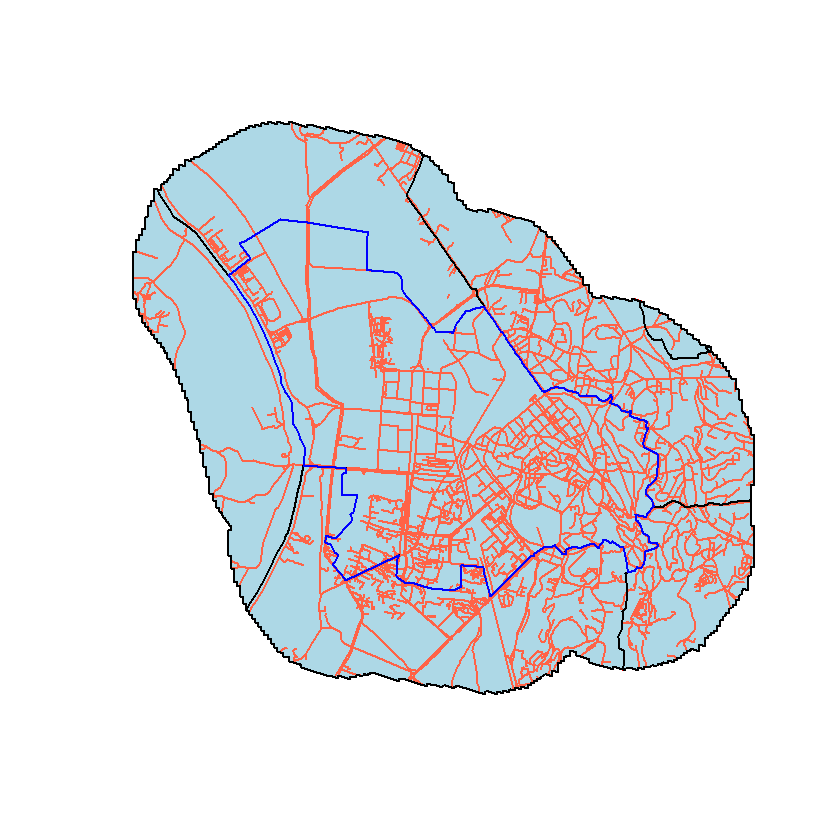

In [25]:
road_cut <- st_intersection(x = route, y = tana_1erArron_b)
lim_admin_cut <- st_intersection(x = lim_admin, y = tana_1erArron_b)

plot(st_geometry(tana_1erArron_b), col = "lightblue", lwd=2, border = "red")
plot(st_geometry(road_cut), add = TRUE, lwd = 2, col = "tomato")
plot(st_geometry(lim_admin_cut), add = TRUE, lwd = 2)
plot(st_geometry(tana_1erArron), add = TRUE, lwd = 2, border = "blue")

### Mesures
#### Créer une matrice de distances
Si le système de projection du jeu de données est renseigné, les distances sont exprimées dans l’unité de mesure de la projection (en mètres le plus souvent).
> Ici, nous voulons connaitre la distance entre les centroïdes de chaque district ```lim_admin_c``` et le 1er arrondissement d'Antananarivo ```tana_1erArron```.

In [26]:
distance_matrix <- st_distance(x = lim_admin_c, y = tana_1erArron)
print(head(distance_matrix))

Units: [m]
          [,1]
[1,]    0.0000
[2,] 1986.4506
[3,]  751.8466
[4,] 1272.9235
[5,] 2777.0411
[6,] 2286.9241


In [27]:
colnames(distance_matrix) <- "1erArr"
rownames(distance_matrix) <- lim_admin_c$ADM2_EN
print(head(distance_matrix))

Units: [m]
                      1erArr
1er Arrondissement    0.0000
2e Arrondissement  1986.4506
3e Arrondissement   751.8466
4e Arrondissement  1272.9235
5e Arrondissement  2777.0411
6e Arrondissement  2286.9241


### Export
```st_write()``` permet d’exporter une couche contenant des entités vectorielles avec nombreux types de fichiers de sortie.
> Les lignes suivantes exportent l’objet ```tana_1erArron``` dans un dossier ```data``` aux format shapefile (.shp) :

In [73]:
st_write(obj = tana_1erArron, "./data/tana_1erArron.shp", layer_options = "ENCODING=UTF-8", delete_layer = TRUE)

Writing layer `tana_1erArron' to data source 
  `./data/tana_1erArron.shp' using driver `ESRI Shapefile'
options:        ENCODING=UTF-8 
Writing 1 features with 11 fields and geometry type Multi Polygon.


## Les données Raster
***
Le package ```terra``` permet entre autres de manipuler des données raster.
Le package stocke les données spatiales dans des objets de type ```SpatRaster```.
> Les objets ```SpatRaster``` représentent des données matricielles, en une ou plusieurs couches (variables). Cet objet stocke également un certain nombre de paramètres fondamentaux qui le décrivent (nombre de colonnes, de lignes, étendue spatiale, système de référence des coordonnées…).

<img src="./www/raster.png" 
     align="center" 
     width="300" />


### Import et affichage de données raster

In [33]:
library(terra)

s2_image <- rast("./data/s2_image_L2A_60m_TCI_.tif") 
s2_image

class       : SpatRaster 
dimensions  : 1866, 1866, 3  (nrow, ncol, nlyr)
resolution  : 59.9856, 59.98416  (x, y)
extent      : 298526.7, 410459.9, 7389149, 7501080  (xmin, xmax, ymin, ymax)
coord. ref. : WGS 84 / UTM zone 38S (EPSG:32738) 
source      : s2_image_L2A_60m_TCI_.tif 
colors RGB  : 1, 2, 3 
names       : s2_image_L~60m_TCI__1, s2_image_L~60m_TCI__2, s2_image_L~60m_TCI__3 

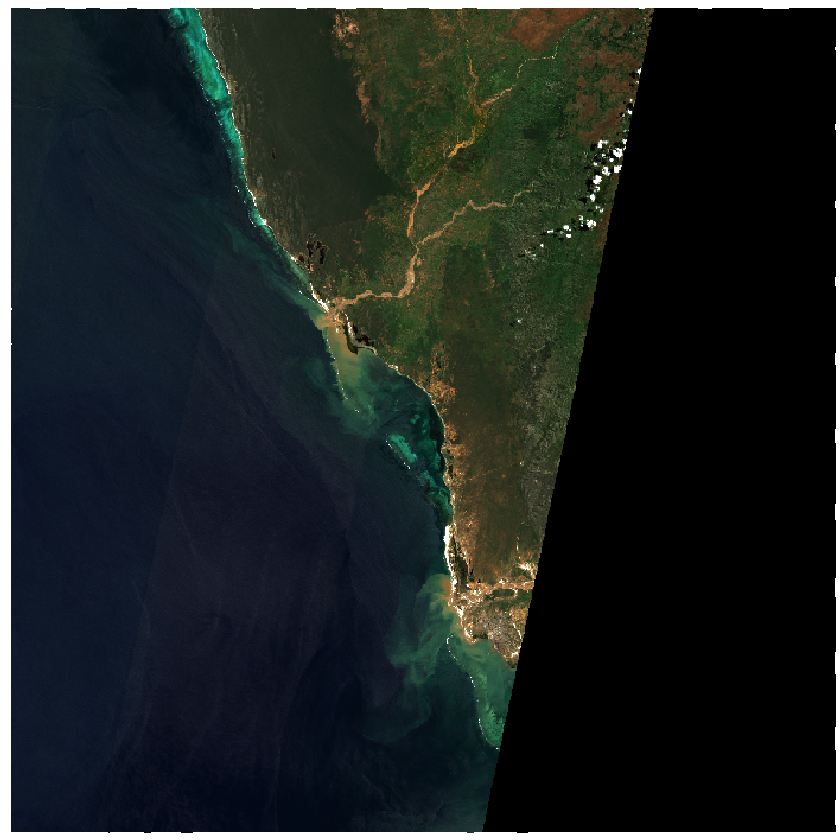

In [30]:
plot(s2_image)

##### Accès aux bandes de l'image
La variables ```names``` de ```s2_image``` indique le nom de chaque bande de l'image. Ici, les bandes RGB sont appelées ```s2_image_L~60m_TCI__1```... 

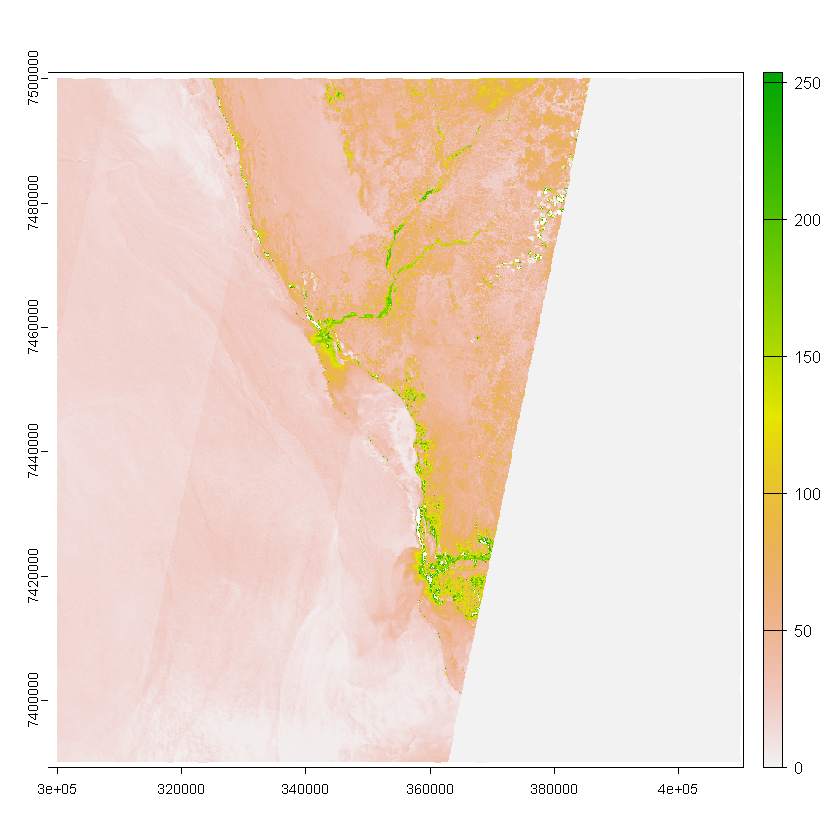

In [31]:
plot(s2_image$s2_image_L2A_60m_TCI__1)

Il est possible de renommer ces bandes pour faciliter la manipulation de données :

In [34]:
names(s2_image) <- c('red', 'green','blue')
s2_image

class       : SpatRaster 
dimensions  : 1866, 1866, 3  (nrow, ncol, nlyr)
resolution  : 59.9856, 59.98416  (x, y)
extent      : 298526.7, 410459.9, 7389149, 7501080  (xmin, xmax, ymin, ymax)
coord. ref. : WGS 84 / UTM zone 38S (EPSG:32738) 
source      : s2_image_L2A_60m_TCI_.tif 
colors RGB  : 1, 2, 3 
names       : red, green, blue 

### Les systèmes de coordonnées
#### Consulter le système de coordonnées d'un objet
La fonction ```crs()``` permet de consulter le système de coordonnées utilisé par un objet ```SpatRaster``` :

In [33]:
crs(s2_image)

[1] "PROJCRS[\"WGS 84 / UTM zone 38S\",\n    BASEGEOGCRS[\"WGS 84\",\n        DATUM[\"World Geodetic System 1984\",\n            ELLIPSOID[\"WGS 84\",6378137,298.257223563,\n                LENGTHUNIT[\"metre\",1]]],\n        PRIMEM[\"Greenwich\",0,\n            ANGLEUNIT[\"degree\",0.0174532925199433]],\n        ID[\"EPSG\",4326]],\n    CONVERSION[\"UTM zone 38S\",\n        METHOD[\"Transverse Mercator\",\n            ID[\"EPSG\",9807]],\n        PARAMETER[\"Latitude of natural origin\",0,\n            ANGLEUNIT[\"degree\",0.0174532925199433],\n            ID[\"EPSG\",8801]],\n        PARAMETER[\"Longitude of natural origin\",45,\n            ANGLEUNIT[\"degree\",0.0174532925199433],\n            ID[\"EPSG\",8802]],\n        PARAMETER[\"Scale factor at natural origin\",0.9996,\n            SCALEUNIT[\"unity\",1],\n            ID[\"EPSG\",8805]],\n        PARAMETER[\"False easting\",500000,\n            LENGTHUNIT[\"metre\",1],\n            ID[\"EPSG\",8806]],\n        PARAMETER[\"False northing\",10000000,\n            LENGTHUNIT[\"metre\",1],\n            ID[\"EPSG\",8807]]],\n    CS[Cartesian,2],\n        AXIS[\"(E)\",east,\n            ORDER[1],\n            LENGTHUNIT[\"metre\",1]],\n        AXIS[\"(N)\",north,\n            ORDER[2],\n            LENGTHUNIT[\"metre\",1]],\n    USAGE[\n        SCOPE[\"Navigation and medium accuracy spatial referencing.\"],\n        AREA[\"Between 42°E and 48°E, southern hemisphere between 80°S and equator, onshore and offshore. Madagascar.\"],\n        BBOX[-80,42,0,48]],\n    ID[\"EPSG\",32738]]"

#### Modifier le système de coordonnées d'un objet 
La fonction ```project()``` permet de changer le système de coordonnées d'un objet ```SpatRaster``` et le reprojeter :

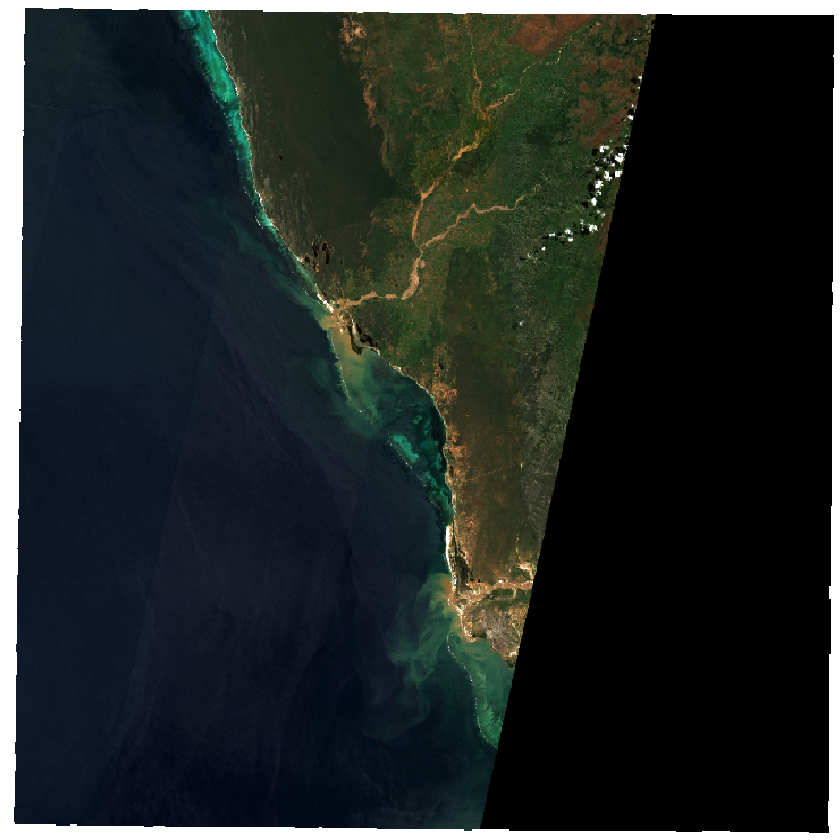

In [35]:
# Projection en WGS84
s2_image_wgs84 <- project(x= s2_image, y =  "EPSG:4326", method = "bilinear", gdal = FALSE)

plotRGB(s2_image_wgs84, r="red", g="green", b="blue")

### Extraction 
#### Découpage d'un raster
Le découpage d’un raster en fonction de l’étendue d’un autre objet ```SpatVector``` ou ```SpatRaster``` est réalisable avec la fonction ```crop()```.
> Ici, nous allons découper l'image Sentinel-2 avec l'étendue de la couche des limites administratives (.shp).

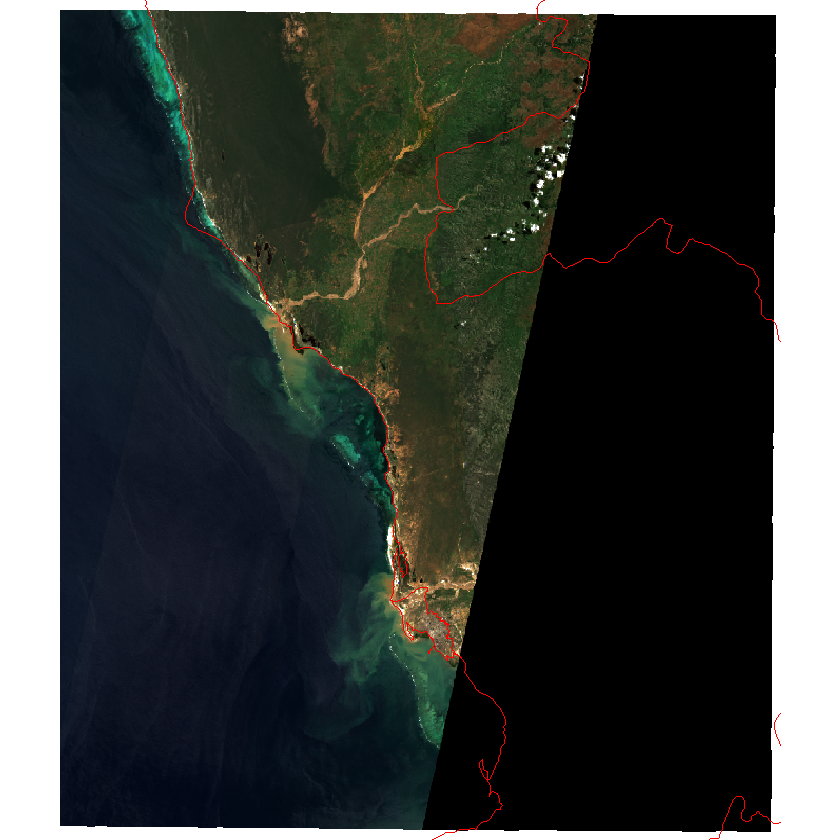

In [51]:
crop_s2_image <- crop(s2_image_wgs84, lim_admin)

plotRGB(crop_s2_image, r="red", g="green", b="blue")
plot(st_geometry(lim_admin), add=TRUE, border="red")

#### Masquage
Pour afficher uniquement les valeurs d’un raster contenues dans un polygone, utilisez la fonction ```mask()```.

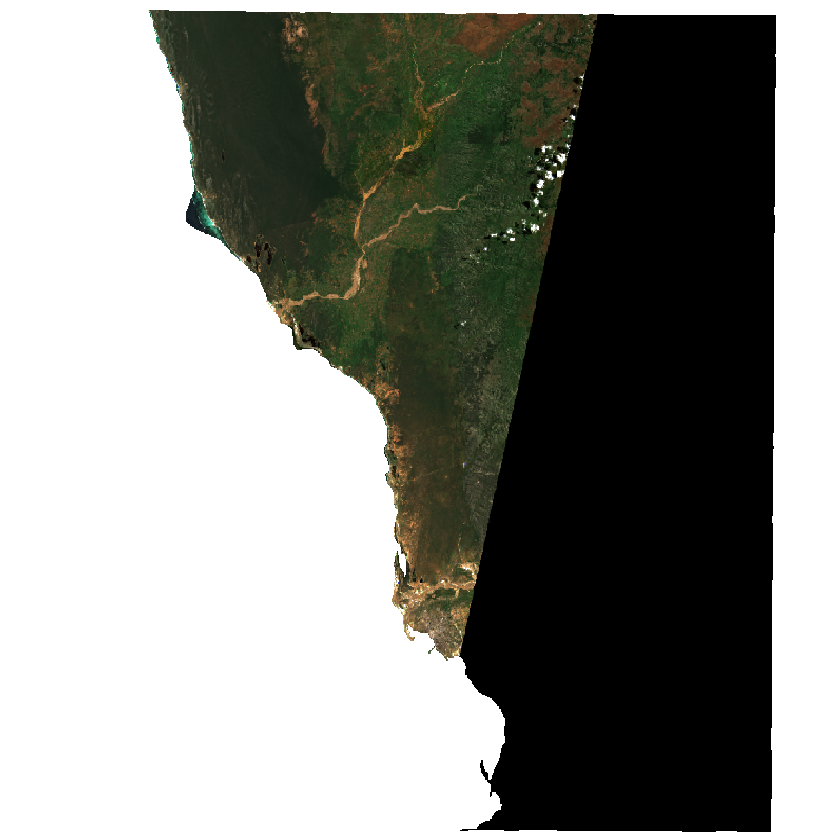

In [52]:
mask_s2_image <- mask(crop_s2_image, lim_admin)

plotRGB(mask_s2_image, r="red", g="green", b="blue")

### Agrégation & désagrégation
Le ré-échantillonnage d’un raster dans une résolution différente se fait en deux étapes.
<img src="./www/agregation.png" 
     align="center" 
     width="800" />
- Créer une grille de même étendue
- Ré-échantilloner grâce à la fonction ```resample()``` 

### Opérations sur pixels
#### Remplacement de valeur

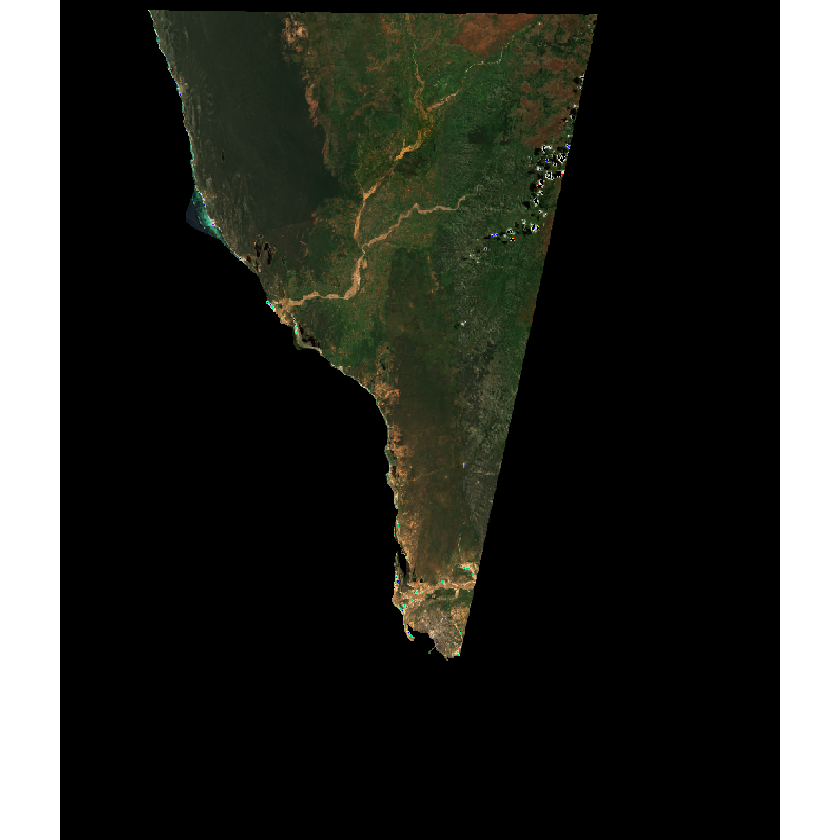

In [53]:
# Remplace les valeurs NA par 0
mask_s2_image[is.na(mask_s2_image )] <- 0

plotRGB(mask_s2_image, r="red", g="green", b="blue")

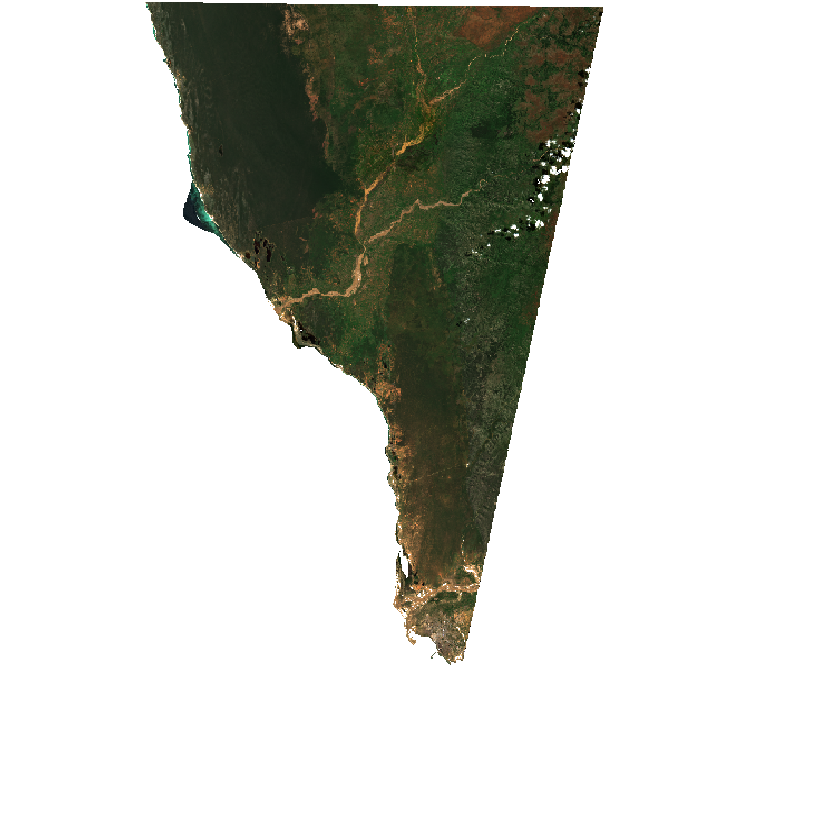

In [135]:
mask_s2_image <- mask(crop_s2_image, lim_admin)
# Remplace les valeurs de pixel égales à 0 pour chacune des bandes
mask_s2_image[(mask_s2_image$red == 0) & (mask_s2_image$green == 0) & (mask_s2_image$blue == 0)]  <- NA
plot(mask_s2_image)

### Opérations entre bandes

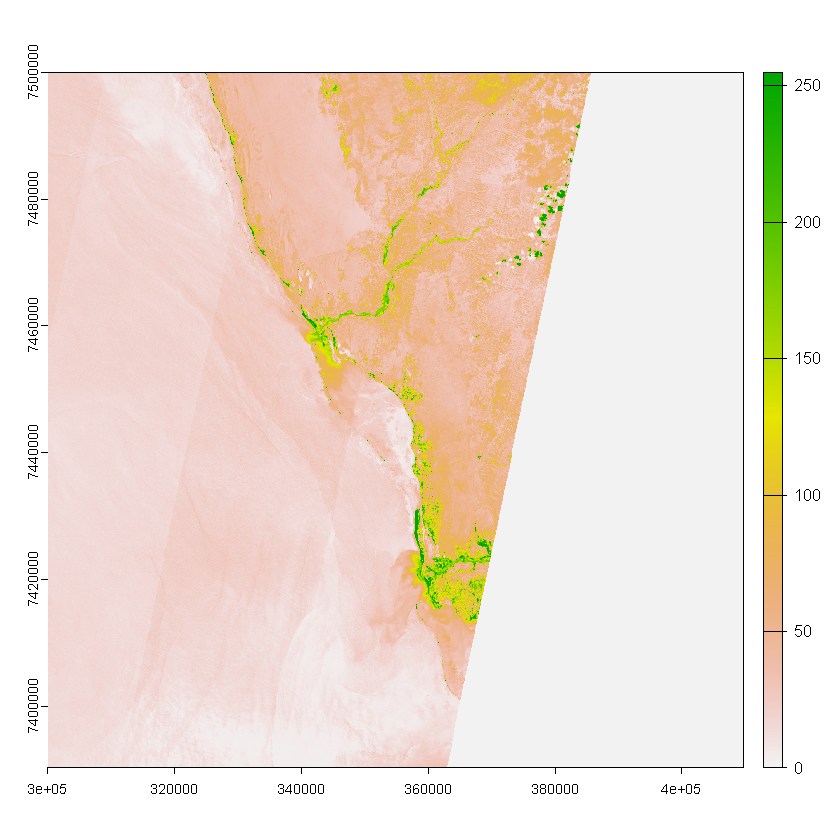

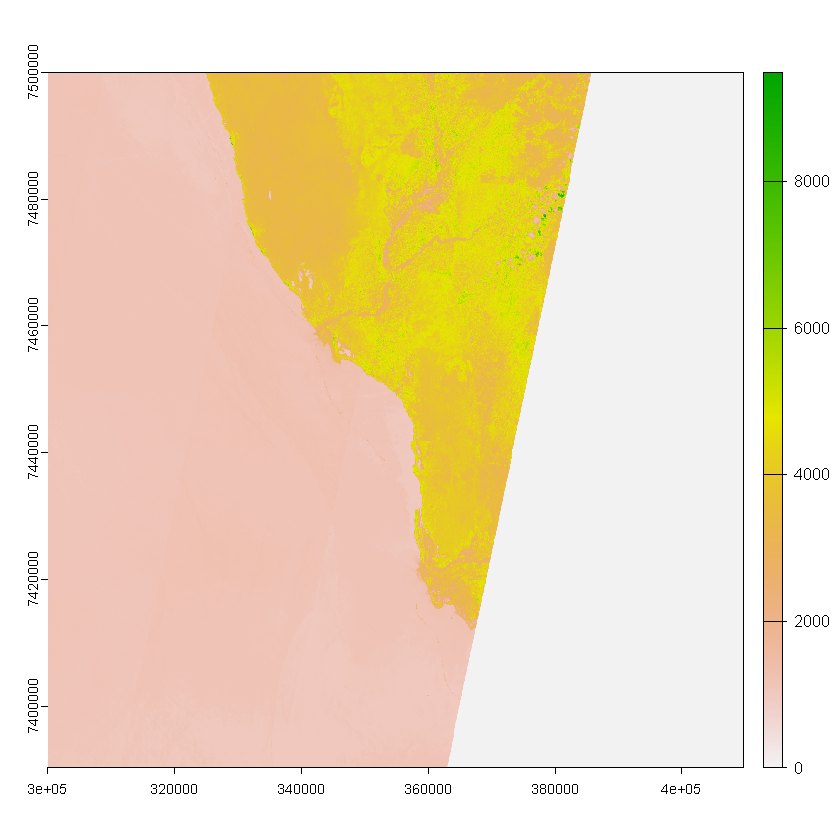

In [54]:
options(warn=-1)
# Bande spectrale rouge
tci_s2_image <- rast("./data/T38KLV_20230312T072209_TCI_60m.jp2")
names(tci_s2_image ) <- c('red', 'green','blue')
red <- tci_s2_image$red
plot(red)

# Import de la bande spectrale proche infrarouge
IR_s2_image <- rast("./data/T38KLV_20230312T072209_B8A_60m.jp2")
plot(IR_s2_image)

À partir de ces deux rasters, nous pouvons calculer l’indice de végétation normalisé (NDVI) :

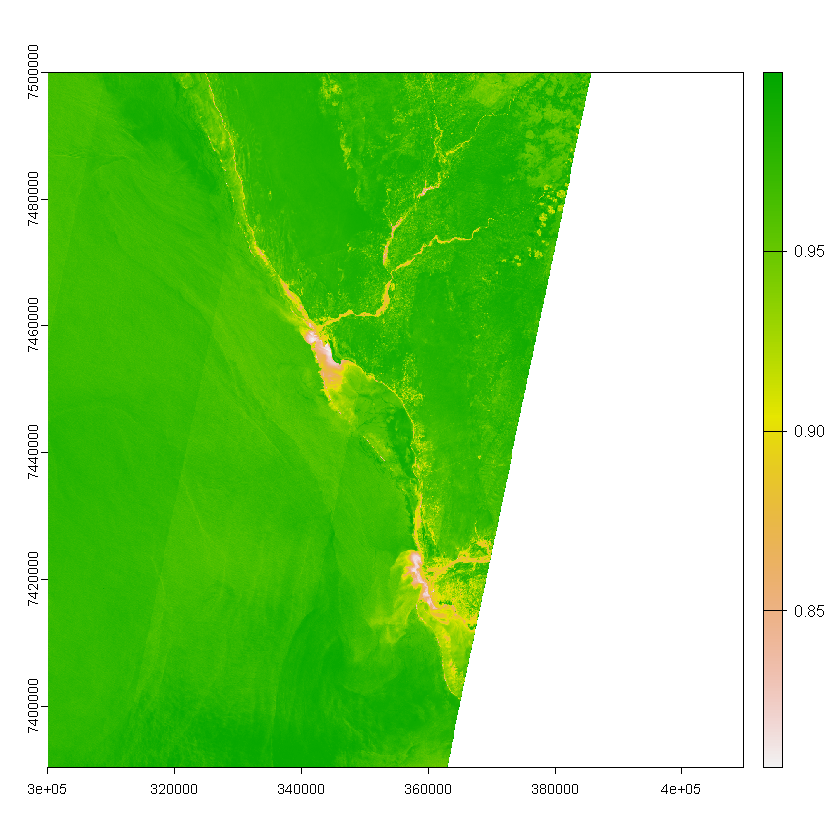

In [55]:
options(warn=-1)
raster_NDVI <- (IR_s2_image - red ) / (IR_s2_image + red )

plot(raster_NDVI)

### Analyse sur des rasters d'élévation
La fonction ```terrain()``` permet de réaliser des analyses spécifiques à un raster d’élévation. Voici des exemples de traitements disponibles :

- *slope* = calcul de la pente ou degré d’inclinaison de la surface;
- *aspect* = calcul de l’orientation de la pente;
- *roughness* = calcul de la variabilité ou l’irrégularité de l’élévation;
- *flowdir* = calcul du sens d’écoulement de l’eau.

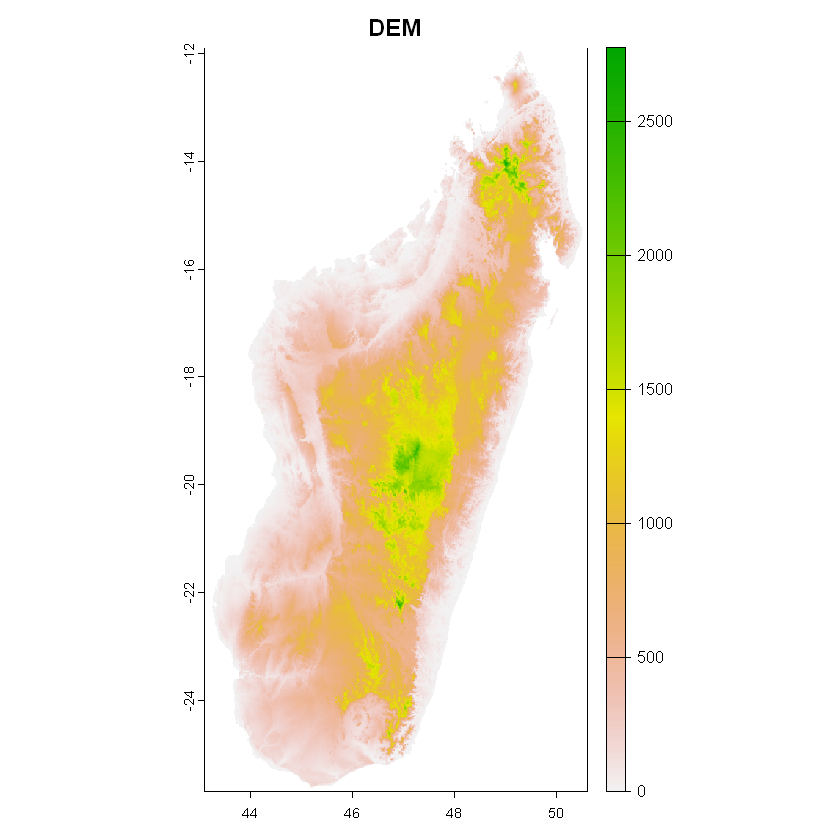

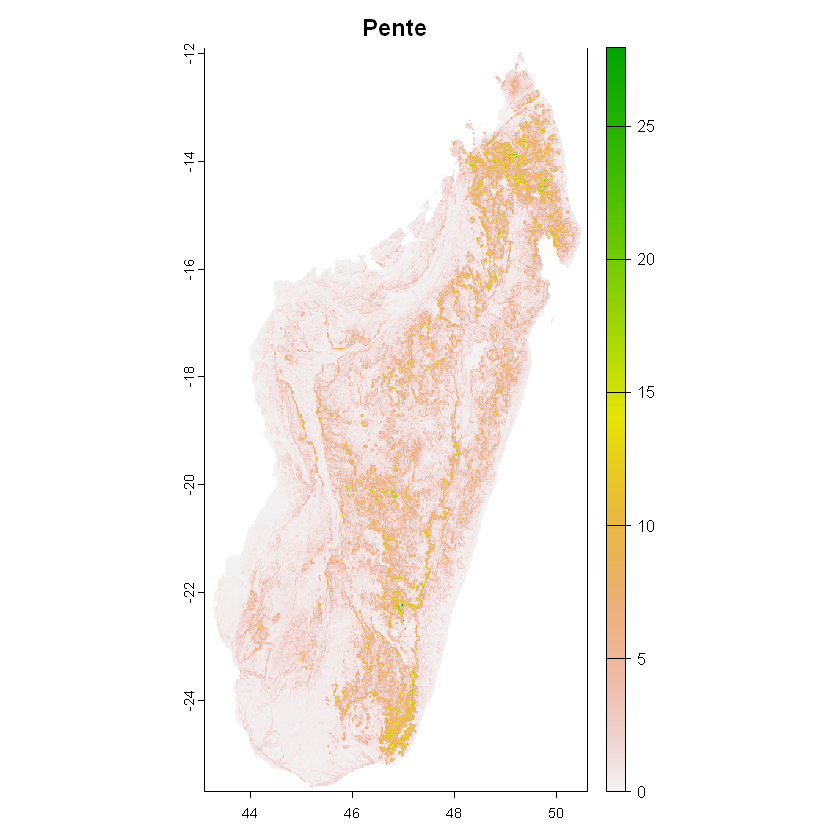

In [56]:
# Import du DEM
dem <- rast("./data/DEM_Madagascar_WGS84.tif")
plot(dem,main="DEM")

# Calcul de la pente (slope)
slope <- terrain(dem, "slope", 
                 neighbors = 8, # 8 (ou 4) cellules autour pris en compte
                 unit = "degrees") # Unité en sortie

# Inclinaison des pentes, en degré
plot(slope,main="Pente")

### Reclassification
La reclassification des valeurs d’un raster peut aussi bien être utilisée pour discrétiser des données quantitatives que pour catégoriser des modalités qualitatives.

In [57]:
reclassif <- matrix(c(-10, 0, 0,
                      0, 500, 1,
                      500, 1000, 2, 
                      1000, 1500, 3, 
                      1500, 2000, 4, 
                      2000, 2500, 5,
                      2500, 3000, 6), 
                    ncol = 3, byrow = TRUE)

> Les valeurs comprises entre 500 et 1000 seront remplacées par la valeur 2.
Les valeurs comprises entre 1000 et 1500 seront remplacées par la valeur 3....

La fonction ```classify()``` permet de réaliser la reclassification.

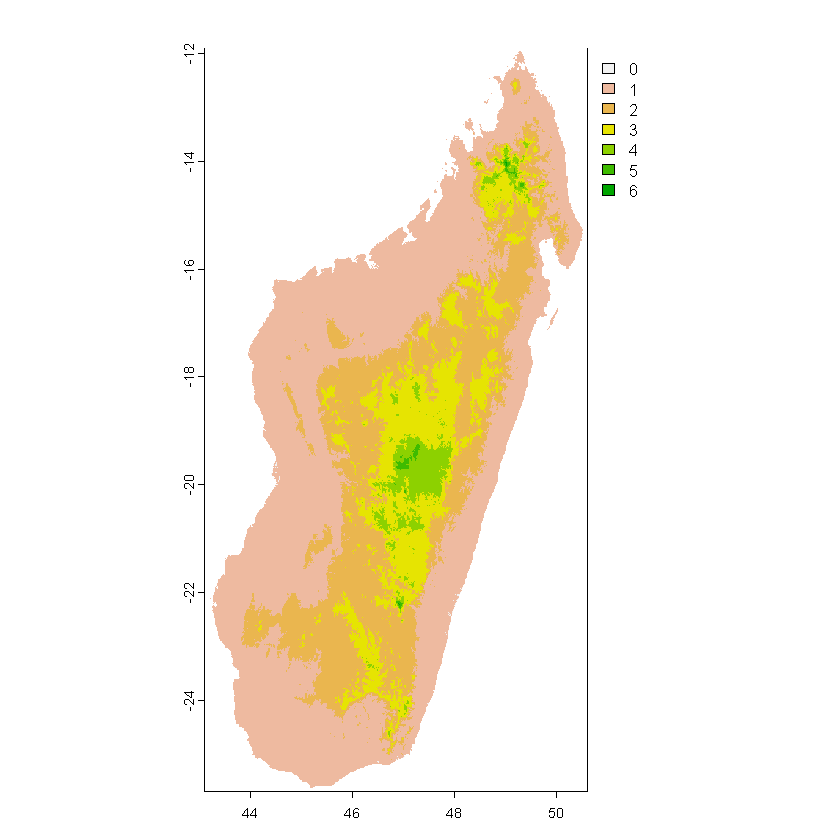

In [58]:
DEM_class <- classify(dem, rcl = reclassif)

plot(DEM_class, type ="classes")

Il est ensuite possibe de modifier le nom et le style des différentes classes :

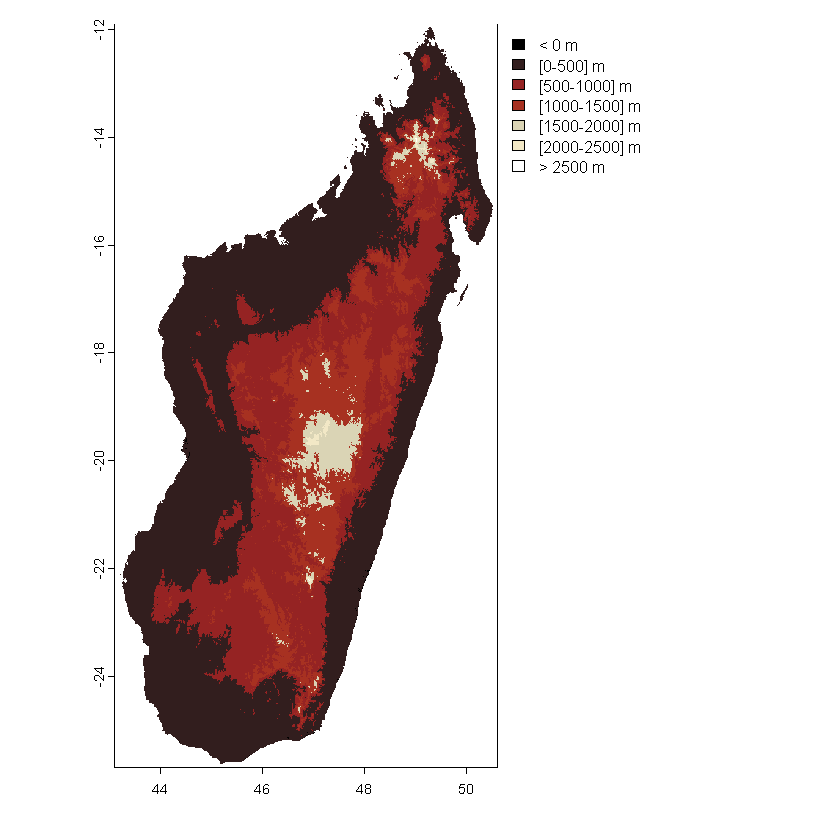

In [60]:
plot(DEM_class, 
     type ="classes", 
     levels=c("< 0 m",
              "[0-500] m",
             "[500-1000] m",
              "[1000-1500] m",
              "[1500-2000] m",
              "[2000-2500] m",
             "> 2500 m"),
     col=c("black",
           "#321E1E",
           "#952323", 
           "#A73121", 
           "#DAD4B5", 
           "#F2E8C6",
          "white"),
     mar=c(3, 1.5, 1, 11))

### Opération zonale à partir d'une couche véctorielle 
La fonction ```extract()``` permet d’extraire et de manipuler les valeurs des cellules qui intersectent des données vectorielles.
Par exemple nous pouvons obtenir la moyenne d'élévation pour chacun des districts de Madagascar : 

In [61]:
elevation_by_district <-  extract(dem, lim_admin, fun=mean)

head(elevation_by_district, 10)

ID DEM_Madagascar_WGS84
1   1 1257.667            
2   2 1279.056            
3   3 1262.111            
4   4 1262.333            
5   5 1265.148            
6   6 1251.571            
7   7 1363.223            
8   8 1292.517            
9   9 1151.399            
10 10 1406.209

### Export

La fonction ```writeRaster()``` permet d’enregistrer un objet SpatRaster sur votre machine, dans le format de votre choix.

In [ ]:
writeRaster(x = slope, filename = "./data/slope_mada.tif")

## Focus sur OpenStreetMap
***
### Importer des données OSM
Le package ```osmdata```  permet d’extraire des données vectorielles depuis OSM. Les différents objets OSM sont classés dans des catégories disponibles à l'adresse suivante [Lien](https://wiki.openstreetmap.org/wiki/Map_features).

Data (c) OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright

Object of class 'osmdata' with:
                 $bbox : -18.9223230479999,47.4907545460001,-18.886533336,47.533917923
        $overpass_call : The call submitted to the overpass API
                 $meta : metadata including timestamp and version numbers
           $osm_points : 'sf' Simple Features Collection with 252 points
            $osm_lines : NULL
         $osm_polygons : 'sf' Simple Features Collection with 14 polygons
       $osm_multilines : NULL
    $osm_multipolygons : NULL




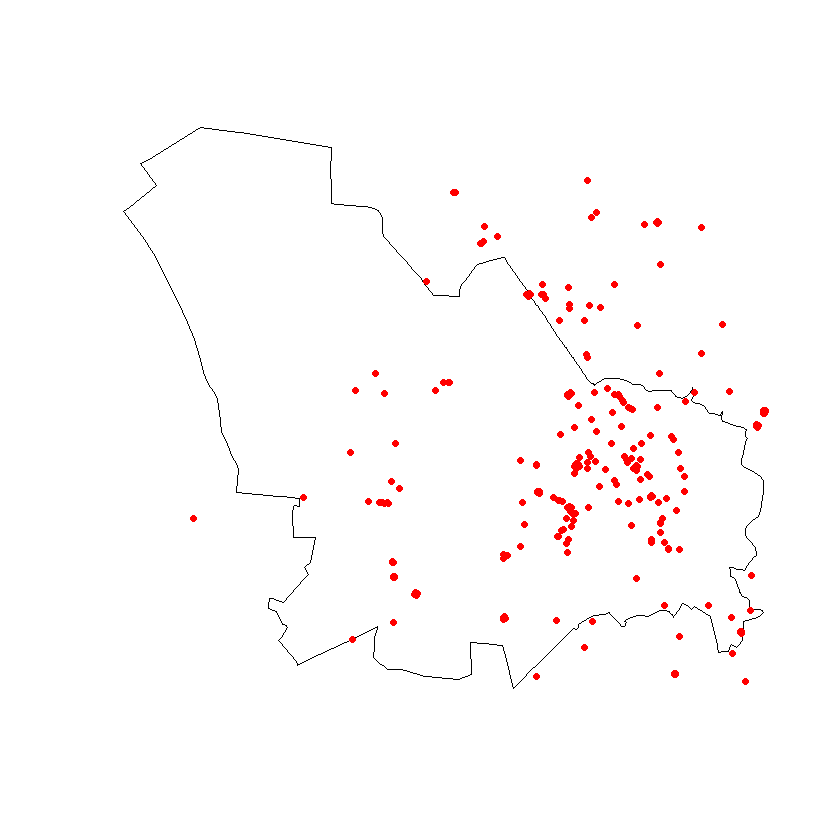

In [62]:
library(osmdata)
library(sf)

# Définition d'une bounding box
q <- opq(bbox = st_bbox(tana_1erArron))
# Extraction des restaurants
req <- add_osm_feature(opq = q, key = 'amenity', value = "restaurant")
res <- osmdata_sf(req)

print(res)
plot(st_geometry(tana_1erArron))
plot(st_geometry(res$osm_points),add=TRUE,  cex = 1.2, col = "red", pch = 20)

### Importer des fonds de carte
Le package ```maptiles``` permet de télécharger et d’afficher des fonds de cartes raster.
La fonction ```get_tiles()``` permet de télécharger des fonds de cartes OSM et la fonction ```plot_tiles()``` permet de les afficher.

In [ ]:
library(sf)
library(maptiles)

tana <- st_transform(tana_1erArron, 3857)
osm_tiles <- get_tiles(x = tana, zoom = 10, crop = TRUE)
plot_tiles(osm_tiles)
plot(st_geometry(tana), border = "grey20", lwd = .7, add = TRUE)

# Sources
***
Ce document a été fortement inspiré par :
> **Giraud, T., & Pecout, H. (2023). Géomatique avec R (Version 1.0.1). https://doi.org/10.5281/zenodo.7528145**